# Codenation - Enem 2016

Objetivo: criar um modelo para prever a nota da prova de matemática de quem participou do ENEM 2016.

Muitas universidades brasileiras utilizam o ENEM para selecionar seus futuros alunos e alunas. Isto é feito com uma média ponderada das notas das provas de matemática, ciências da natureza, linguagens e códigos, ciências humanas e redação, com os pesos abaixo:

matemática: 3
ciências da natureza: 2
linguagens e códigos: 1.5
ciências humanas: 1
redação: 3
No arquivo test.csv crie um modelo para prever nota da prova de matemática (coluna NU_NOTA_MT) de quem participou do ENEM 2016.

Salve sua resposta em um arquivo chamado answer.csv com duas colunas: NU_INSCRICAO e NU_NOTA_MT.

Faça o upload do arquivo answer.csv usando o botão “Submeter resposta”.



## Import libraries

In [125]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%pylab inline
plt.style.use('ggplot')
sns.set()

from sklearn.preprocessing import StandardScaler

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['long']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [126]:
path = "~/Documents/Codenation_challenge/dados/"
in_path = os.path.normcase(path + 'input/')
out_path = os.path.normcase(path+ 'output/')

In [127]:
in_path

'~\\documents\\codenation_challenge\\dados\\input\\'

In [128]:
df_enem_raw =  pd.read_csv(in_path +'train.csv')

In [129]:
df_enem_raw.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [9]:
pd.set_option('display.max_rows', df_enem_raw.describe(include = 'all').shape[1]+1)

In [130]:
df_enem_raw.shape

(13730, 167)

In [131]:
df_info = pd.DataFrame({'Type': df_enem_raw.dtypes,
                       'Nunique': df_enem_raw.nunique(),
                       'nan': round(df_enem_raw.isna().sum()/len(df_enem_raw),3)*100})

In [132]:
df_info

,Type,Nunique,nan
Unnamed: 0,int64,4587,0.0
NU_INSCRICAO,object,13730,0.0
NU_ANO,int64,1,0.0
CO_MUNICIPIO_RESIDENCIA,int64,2709,0.0
NO_MUNICIPIO_RESIDENCIA,object,2632,0.0
CO_UF_RESIDENCIA,int64,27,0.0
SG_UF_RESIDENCIA,object,27,0.0
NU_IDADE,int64,55,0.0
TP_SEXO,object,2,0.0
TP_ESTADO_CIVIL,float64,4,3.8


# Análise exploratória dos dados

### DADOS DO PARTICIPANTE

In [133]:
df_enem = df_enem_raw.drop(['Unnamed: 0', 'NU_INSCRICAO', 'NU_ANO'], axis =1).copy()

#### Estados

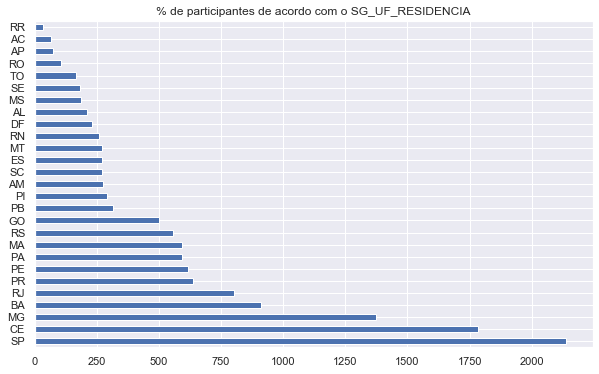

In [134]:
df_enem['SG_UF_RESIDENCIA'].value_counts().plot.barh(title = '% de participantes de acordo com o SG_UF_RESIDENCIA', 
                                                     figsize = (10,6))
plt.show()

#### Idade

In [23]:
df_enem['NU_IDADE'].describe().T

count    13730.000000
mean        21.593809
std          7.043654
min         13.000000
25%         17.000000
50%         19.000000
75%         23.000000
max         67.000000
Name: NU_IDADE, dtype: float64

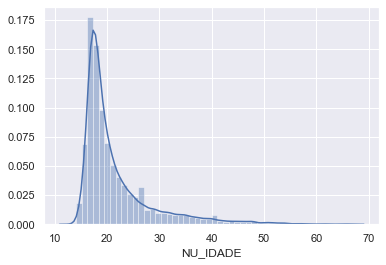

In [726]:
chart = sns.distplot(df_enem['NU_IDADE'])

#### Sexo

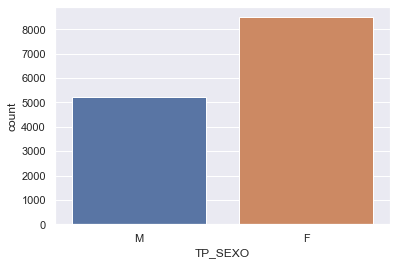

In [42]:
sns.countplot(df_enem['TP_SEXO'])

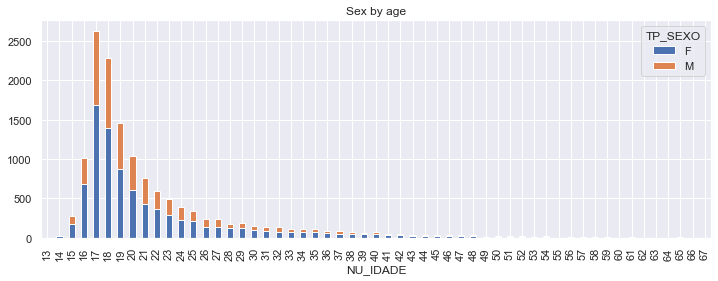

In [70]:
pd.crosstab(df_enem["NU_IDADE"], df_enem["TP_SEXO"]).plot(kind='bar', stacked=True, title = 'Sex by age', figsize = (12,4))

In [71]:
df_enem['TP_SEXO'] = df_enem['TP_SEXO'].map({'M':0,'F':1})

#### Situação de Conclusão do Ensino Médio  

[]

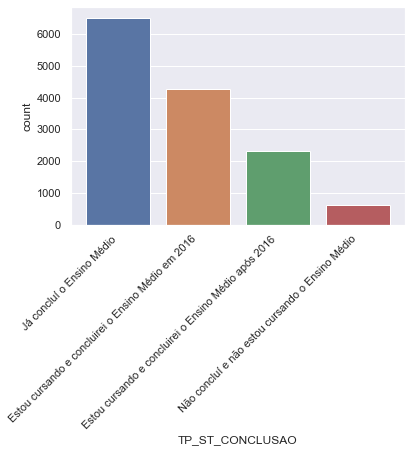

In [73]:
dic_situacao_conclusao={
1:'Já concluí o Ensino Médio',
2:'Estou cursando e concluirei o Ensino Médio em 2016',
3:'Estou cursando e concluirei o Ensino Médio após 2016',
4:'Não concluí e não estou cursando o Ensino Médio',
}
temp_situacao_conclusao = df_enem['TP_ST_CONCLUSAO'].map(dic_situacao_conclusao)
chart = sns.countplot(x = temp_situacao_conclusao, data = df_enem)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.plot()

#### Ano de conclusão

[]

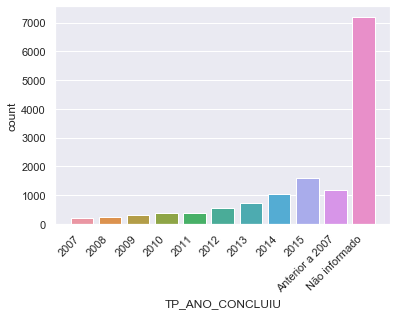

In [74]:
dic_ano_conc = { 
0:'Não informado',
1:'2015',
2:'2014',
3:'2013',
4:'2012',
5:'2011',
6:'2010',
7:'2009',
8:'2008',
9:'2007',
10:'Anterior a 2007'}

temp_ano_conc = df_enem['TP_ANO_CONCLUIU'].map(dic_ano_conc)

chart = sns.countplot(data = df_enem, x =temp_ano_conc.sort_values(ascending=True))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45,horizontalalignment='right')
chart.plot()

#### Tipo de escola que cursou Ensino médio

In [75]:
df_enem['TP_ESCOLA'].value_counts()

1    9447
2    3713
3     569
4       1
Name: TP_ESCOLA, dtype: int64

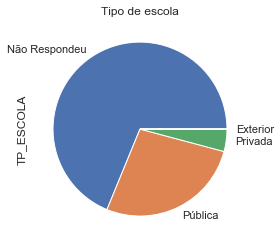

In [76]:
dic_tipo_escola = {
1:'Não Respondeu',
2:'Pública',
3:'Privada',
4:'Exterior'}
temp_tipo_escola= df_enem['TP_ESCOLA'].map(dic_tipo_escola)
temp_tipo_escola.value_counts(normalize=True,dropna = False).plot.pie(title = 'Tipo de escola')

### Tipo de ensino

In [77]:
df_enem['TP_ENSINO'].value_counts(dropna = False)

NaN    9448
1.0    3886
3.0     370
2.0      26
Name: TP_ENSINO, dtype: int64

[]

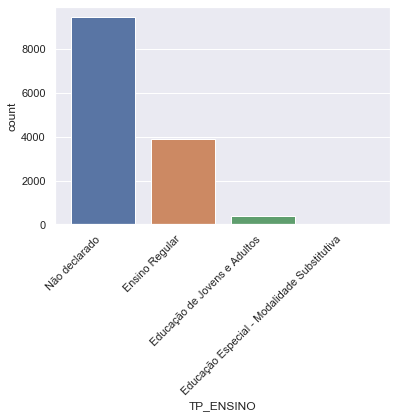

In [78]:
dic_ensino = {
1:'Ensino Regular',
2:'Educação Especial - Modalidade Substitutiva',
3:'Educação de Jovens e Adultos',
np.nan: 'Não declarado'}

temp_ensino = df_enem['TP_ENSINO'].map(dic_ensino)
chart = sns.countplot(data=df_enem, x = temp_ensino)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45,horizontalalignment='right')
chart.plot()

#### Candidato que fez a prova com intuito de apenas treinar seus conhecimentos

In [736]:
df_enem['IN_TREINEIRO'].value_counts(dropna=False)

0    11947
1     1783
Name: IN_TREINEIRO, dtype: int64

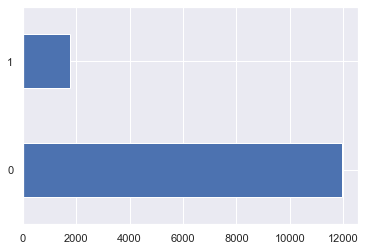

In [737]:
df_enem['IN_TREINEIRO'].value_counts().plot.barh()

#### Estado civil

In [738]:
temp_estado_civil.unique()

array(['Solteiro(a)', 'Não declarado',
       'Casado(a)/ Mora com companheiro(a)',
       'Divorciado(a)/Desquitado(a)/Separado(a)', 'Viúvo(a)'],
      dtype=object)

[]

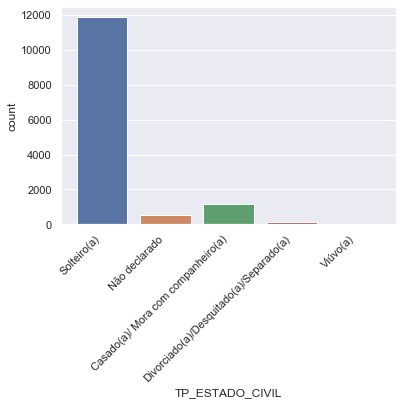

In [739]:
dic_estado_civil = {
0 : 'Solteiro(a)',
1 : 'Casado(a)/ Mora com companheiro(a)',
2 : 'Divorciado(a)/Desquitado(a)/Separado(a)', 
3 : 'Viúvo(a)',
np.nan : 'Não declarado'}
temp_estado_civil = df_enem['TP_ESTADO_CIVIL'].map(dic_estado_civil)

#chart = sns.barplot(x=temp_estado_civil.unique(), y=temp_estado_civil.value_counts(dropna=False))
chart = sns.countplot(x=temp_estado_civil, data=df_enem)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45,horizontalalignment='right')
chart.plot()

#### Nacionalidade

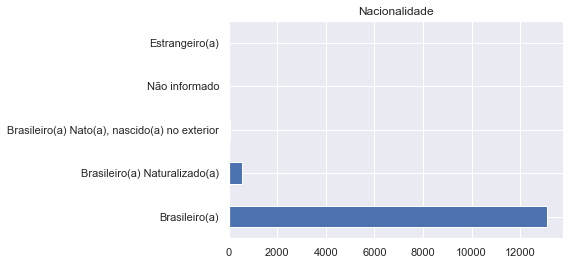

In [740]:
dic_nac = {
0 : 'Não informado',
1 : 'Brasileiro(a)',
2 : 'Brasileiro(a) Naturalizado(a)', 
3 : 'Estrangeiro(a)',
4 : 'Brasileiro(a) Nato(a), nascido(a) no exterior'}

df_enem['TP_NACIONALIDADE'].map(dic_nac).value_counts().plot.barh(title = 'Nacionalidade')

In [741]:
dic_raca = {
0:'Não declarado',
1:'Branca',
2:'Preta',
3:'Parda',
4:'Amarela', 
5:'Indígena', 
6:'Não dispõe da informação'}
temp_raca = df_enem['TP_COR_RACA'].map(dic_raca)

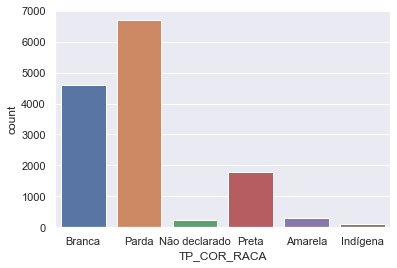

In [742]:
sns.countplot(x = temp_raca, data = df_enem)

In [79]:
municipios = pd.read_excel(in_path+'municipios_brasil.xls',encoding='latin1')
municipios.head()

,GEOCODIGO_MUNICIPIO,NOME_MUNICIPIO,LONGITUDE,LATITUDE
0,1100015,ALTA FLORESTA D'OESTE,-61.999824,-11.935540
1,1100023,ARIQUEMES,-63.033269,-9.908463
2,1100031,CABIXI,-60.544314,-13.499763
3,1100049,CACOAL,-61.442944,-11.433865
4,1100056,CEREJEIRAS,-60.818426,-13.195033


In [80]:
#``` python ```
import folium
from folium import plugins

# Especificando a localização, o valor de zoom e o tipo do mapa:
mapa = folium.Map(location=[-15.788497,-47.879873],zoom_start=0.5,tiles='Stamen Toner')
coordenadas=[]
# Limitando o número de registros para não travar a máquina:
for cid in (df_enem.CO_MUNICIPIO_RESIDENCIA[:20000]):
    # Pegando os valores de longitude e latitude das duas bases:
    lat = (municipios[municipios['GEOCODIGO_MUNICIPIO'] == cid]['LATITUDE'].values)
    long = (municipios[municipios['GEOCODIGO_MUNICIPIO'] == cid]['LONGITUDE'].values)
    if lat != '' and long != '':
# Tratando os valores de lat e log:
        try:
            lat = float(str(lat).replace('[','').replace(']',''))
            long = float(str(long).replace('[','').replace(']',''))
            coordenadas.append([lat,long])
        except:
            print(cid)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  del sys.path[0]


In [81]:
#``` python```
# Alimentando o mapa com as coordenadas fornecidas pelo código anterior:
mapa.add_child(plugins.HeatMap(coordenadas))    
mapa.save('mapa-consumidor.html')
mapa


DADOS DA ESCOLA

In [82]:
df_enem.drop(columns = list(df_enem.loc[:,'CO_ESCOLA':'TP_SIT_FUNC_ESC'].columns), inplace = True)

DADOS DOS PEDIDOS DE ATENDIMENTO ESPECIALIZADO

In [83]:
df_enem.loc[:,'IN_BAIXA_VISAO':'IN_OUTRA_DEF'].sum(axis=0)

IN_BAIXA_VISAO             17
IN_CEGUEIRA                 0
IN_SURDEZ                   5
IN_DEFICIENCIA_AUDITIVA     7
IN_SURDO_CEGUEIRA           0
IN_DEFICIENCIA_FISICA      30
IN_DEFICIENCIA_MENTAL       2
IN_DEFICIT_ATENCAO         13
IN_DISLEXIA                 1
IN_DISCALCULIA              1
IN_AUTISMO                  0
IN_VISAO_MONOCULAR          6
IN_OUTRA_DEF                7
dtype: int64

In [84]:
df_enem['IN_ESPECIAL'] = (df_enem.loc[:,'IN_BAIXA_VISAO':'IN_OUTRA_DEF'].sum(axis=1))

In [85]:
df_enem['IN_ESPECIAL'].apply(lambda x: 1 if x>=1 else 0)

0        0
1        0
2        0
3        0
4        0
        ..
13725    0
13726    0
13727    0
13728    0
13729    0
Name: IN_ESPECIAL, Length: 13730, dtype: int64

In [86]:
df_enem.drop(columns = list(df_enem.loc[:,'IN_BAIXA_VISAO':'IN_OUTRA_DEF'].columns), inplace=True)

DADOS DOS PEDIDOS DE ATENDIMENTO ESPECÍFICO

In [87]:
df_enem.loc[:,'IN_SABATISTA':'IN_ESTUDA_CLASSE_HOSPITALAR'].sum(axis=0)

IN_SABATISTA                   133
IN_GESTANTE                     13
IN_LACTANTE                     22
IN_IDOSO                         2
IN_ESTUDA_CLASSE_HOSPITALAR      0
dtype: int64

In [88]:
df_enem.drop(columns = list(df_enem.loc[:,'IN_SABATISTA':'IN_ESTUDA_CLASSE_HOSPITALAR'].columns), inplace=True)

DADOS DOS PEDIDOS DE RECURSOS ESPECIALIZADOS E ESPECÍFICOS PARA REALIZAÇÃO DAS PROVAS

In [89]:
df_enem.drop(columns = list(df_enem.loc[:, 'IN_SEM_RECURSO': 'IN_NOME_SOCIAL'].columns), inplace = True)

DADOS DOS PEDIDOS DE CERTIFICAÇÃO DO ENSINO MÉDIO \
- IN_CERFIFICADO - Indicador de solicitação de certificação no Ensino Médio7

In [90]:
list_certificado = ['IN_CERTIFICADO', 'NO_ENTIDADE_CERTIFICACAO', 'CO_UF_ENTIDADE_CERTIFICACAO', 'SG_UF_ENTIDADE_CERTIFICACAO']
df_enem[list_certificado].head()

,IN_CERTIFICADO,NO_ENTIDADE_CERTIFICACAO,CO_UF_ENTIDADE_CERTIFICACAO,SG_UF_ENTIDADE_CERTIFICACAO
0,0,NaN,NaN,NaN
1,0,NaN,NaN,NaN
2,0,NaN,NaN,NaN
3,0,NaN,NaN,NaN
4,0,NaN,NaN,NaN


In [91]:
df_enem.drop(columns = list_certificado, inplace = True)

DADOS DO LOCAL DE APLICAÇÃO DA PROVA

In [92]:
df_enem.drop(columns = list(df_enem.loc[:, 'CO_MUNICIPIO_PROVA': 'SG_UF_PROVA'].columns), inplace = True)

DADOS DA PROVA OBJETIVA

In [135]:
df_enem.loc[:,'TP_PRESENCA_CN':'TX_GABARITO_MT'].head(3)

,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,...,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT
0,1,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,...,399.4,ABACCABDBEDEDEEDDDBBBDAABABECDCCCAAABCBEEABCA,BBEBCAEBCEDBDDEBCACDBCBDABDDCDBEDCEAEABCAADAC,99999DCABCABCBBCADBCBBABAEADBEEBEDAAABAEAECCBB...,AECCCBABDCADDBCBCCADADBBAADEBCEEBABCDDEAABCAA,1,BCADBCEDCCBADBDCADBEBDBEADCCAEACDBEDBCACAEBEE,BCBCCADCCBEDDBEEADBDCECCBBECAEEDDADCDDACAADBA,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC
1,1,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,...,459.8,EDAAABDABADBCCAEDCDDECABADBEECBBAEEDCABCAABBC,ADCAABAADCEDAACDACEEDACBDCBACEDEDBACAADADABDC,99999ACBACDBDBCEADDAEEADCCEACEEDBECAAAACBECDAC...,AEDACBDECEDAEEAEDDEBDECDCECACADCACACAABDACEAB,1,EBEECADBCABECDDBEADCCABDEABEBCADBADDCCCEDBBCA,DCECBAAADCBBECAEDCEDDACCBDDACEDDBADBCADBCBCEE,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC
2,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN


In [136]:
df_enem.loc[:,'TP_PRESENCA_CN':'TX_GABARITO_MT'].columns

Index(['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT'],
      dtype='object')

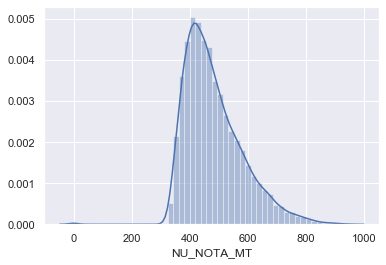

In [137]:
sns.distplot(df_enem['NU_NOTA_MT'].dropna())

Vamos observar quais testes são realizados nos mesmos dias analisando as variáveis de presença e se as notas estão nulas.

In [140]:
df_enem[(df_enem['TP_PRESENCA_CN'] == 0)][['NU_NOTA_CN', 'NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']].isnull().sum(axis=0)

NU_NOTA_CN         3380
NU_NOTA_CH         3380
NU_NOTA_LC         3348
NU_NOTA_MT         3348
NU_NOTA_REDACAO    3348
dtype: int64

Provas CN e CH são relizadas nos mesmos dias e as provas  LC, MT, Redacao são  relizadas juntas
- 3380 faltaram as provas CN e CH
- 3348 das 3380 também faltaram as provas LC, MT, Redacao

In [144]:
df_enem[(df_enem['TP_PRESENCA_LC'] == 0)][['NU_NOTA_CN', 'NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']].isnull().sum(axis=0)

NU_NOTA_CN         3353
NU_NOTA_CH         3353
NU_NOTA_LC         3592
NU_NOTA_MT         3592
NU_NOTA_REDACAO    3592
dtype: int64

- 3592 faltaram as provas LC, MT, Redacao
- 3353 das 3592 também faltaram as provas CN e CH

In [145]:
df_enem[ (df_enem['TP_PRESENCA_LC'] == 0)][['NU_NOTA_CN', 'NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT', 'NU_NOTA_REDACAO']].notnull().sum(axis=0)

NU_NOTA_CN         239
NU_NOTA_CH         239
NU_NOTA_LC           0
NU_NOTA_MT           0
NU_NOTA_REDACAO      0
dtype: int64

Aparentemente as provas CN e 

Não compareceram - DROP

In [100]:
df_enem[(df_enem['TP_PRESENCA_CN'] == 0) & (df_enem['TP_PRESENCA_LC'] == 0)][['NU_NOTA_CN', 'NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT', 'NU_NOTA_REDACAO']].notnull().sum(axis=0)

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_MT         0
NU_NOTA_REDACAO    0
dtype: int64

In [101]:
df_enem['TP_PRESENCA'] = df_enem[['TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT']].sum(axis = 1)
#df_enem.drop(index = temp_index, inplace=True)

In [102]:
df_enem.loc[(df_enem['TP_PRESENCA_CN'] == 0), 'TP_PRESENCA_CN'] = -1
df_enem.loc[(df_enem['TP_PRESENCA_CH'] == 0), 'TP_PRESENCA_CH'] = -1
df_enem.loc[(df_enem['TP_PRESENCA_LC'] == 0), 'TP_PRESENCA_LC'] = -1
df_enem.loc[(df_enem['TP_PRESENCA_MT'] == 0), 'TP_PRESENCA_MT'] = -1

In [103]:
df_enem.loc[(df_enem['TP_PRESENCA_CN'] == 2), 'TP_PRESENCA_CN'] = -1
df_enem.loc[(df_enem['TP_PRESENCA_CH'] == 2), 'TP_PRESENCA_CH'] = -1
df_enem.loc[(df_enem['TP_PRESENCA_LC'] == 2), 'TP_PRESENCA_LC'] = -1
df_enem.loc[(df_enem['TP_PRESENCA_MT'] == 2), 'TP_PRESENCA_MT'] = -1

In [104]:
df_enem[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT']] = df_enem[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT']].fillna(0)

In [105]:
df_enem.loc[:,'NU_NOTA_CN':'NU_NOTA_MT'].isnull().sum()

NU_NOTA_CN    0
NU_NOTA_CH    0
NU_NOTA_LC    0
NU_NOTA_MT    0
dtype: int64

In [106]:
list_a = list(df_enem.loc[:,'CO_PROVA_CN':'TX_GABARITO_MT'].columns)
list_b = list(df_enem.loc[:,'NU_NOTA_CN':'NU_NOTA_MT'].columns)
[list_a.remove(x) for x in list_b]

[None, None, None, None]

In [107]:
df_enem.drop(columns = list_a, inplace = True)

In [108]:
df_enem[['TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT',
         'NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT']].head(3)

,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
0,1,1,1,1,436.3,495.4,581.2,399.4
1,1,1,1,1,474.5,544.1,599.0,459.8
2,-1,-1,-1,-1,0.0,0.0,0.0,0.0


In [109]:
df_enem['TP_PRESENCA'] = df_enem[['TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT']].sum(axis=1)

In [110]:
df_enem.drop(columns = ['TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT'], inplace = True)

DADOS DA REDAÇÃO

In [111]:
df_enem.loc[:,'TP_STATUS_REDACAO': 'NU_NOTA_REDACAO'].head(5)

,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,1.0,120.0,120.0,120.0,80.0,80.0,520.0
1,1.0,140.0,120.0,120.0,120.0,80.0,580.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


[]

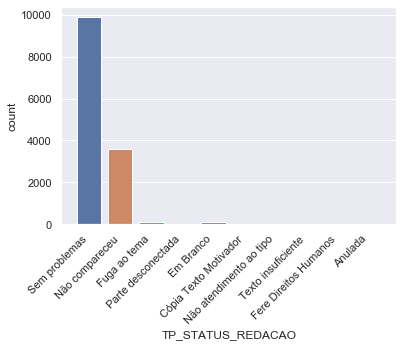

In [112]:
dic_estado_redac = {
1:'Sem problemas',
2:'Anulada',
3:'Cópia Texto Motivador',
4:'Em Branco',
5:'Fere Direitos Humanos',
6:'Fuga ao tema',
7:'Não atendimento ao tipo',
8:'Texto insuficiente',
9:'Parte desconectada',
np.nan: 'Não compareceu'
}
temp_estado_redac = df_enem['TP_STATUS_REDACAO'].map(dic_estado_redac)
chart = sns.countplot(x=temp_estado_redac, data=df_enem)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45,horizontalalignment='right')
chart.plot()

In [113]:
df_enem['TP_STATUS_REDACAO'].value_counts(dropna = False)

1.0    9892
NaN    3597
4.0      96
6.0      85
9.0      20
3.0      16
5.0       8
8.0       8
7.0       6
2.0       2
Name: TP_STATUS_REDACAO, dtype: int64

In [114]:
df_enem.drop(columns=['NU_NOTA_COMP1','NU_NOTA_COMP2', 'NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5'], inplace = True)

In [116]:
df_enem.loc[:,'TP_STATUS_REDACAO': 'NU_NOTA_REDACAO'].head(5)

,TP_STATUS_REDACAO,NU_NOTA_REDACAO
0,1.0,520.0
1,1.0,580.0
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


DADOS DO QUESTIONÁRIO SOCIOECONÔMICO

``` python 
'Q001', 'Q002'
'Q005', 'Q006'
'Q026', 'Q027','Q028', 
'Q028':'Q033'
'Q042', 'Q043'
```

In [121]:
df_enem.loc[:,'Q001':'Q050'].head(3)

,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,D,D,B,B,3,C,A,B,B,B,...,5.0,A,A,A,A,A,A,A,B,D
1,A,A,A,A,5,B,A,B,B,A,...,NaN,A,A,C,A,B,A,A,C,A
2,D,D,B,B,4,C,A,B,C,A,...,NaN,A,A,A,A,C,A,A,B,A


'Q001' Até que série seu pai, ou o homem responsável por você, estudou?\
'Q002' Até que série sua mãe, ou a mulher responsável por você, estudou?

A	Nunca estudou. \
B	Não completou a 4ª série/5º ano do Ensino Fundamental. \
C	Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental. \
D	Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.\
E	Completou o Ensino Médio, mas não completou a Faculdade.\
F	Completou a Faculdade, mas não completou a Pós-graduação.\
G	Completou a Pós-graduação.\
H	Não sei.


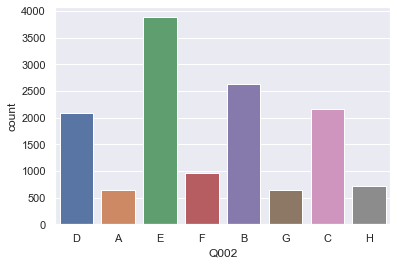

In [122]:
sns.countplot(x = df_enem['Q002'], data = df_enem)

In [389]:
dic_q1_q2 ={
'A':'0',
'B':'1',
'C':'2',
'D':'3',
'E':'4',
'F':'5',
'G':'6',
'H':'-1'}

df_enem['Q001'] = df_enem['Q001'].map(dic_q1_q2)
df_enem['Q002'] = df_enem['Q002'].map(dic_q1_q2)

'Q005' Incluindo você, quantas pessoas moram atualmente em sua residência?

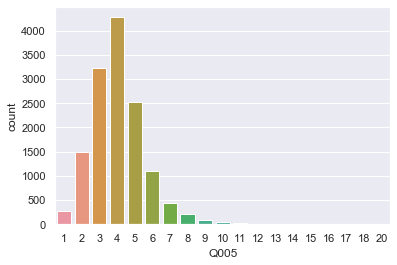

In [390]:
sns.countplot(x = df_enem['Q005'], data = df_enem)

In [819]:
df_enem.drop(columns = list(df_enem.loc[:,'Q001':'Q050'].columns), inplace = True)

In [833]:
df_enem.head()

,CO_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_REDACAO,TP_PRESENCA,IN_ESPECIAL
0,43,24,0,0.0,1,1,4,1,0,436.3,495.4,581.2,399.4,1.0,520.0,4,0
1,23,17,1,0.0,3,2,0,2,0,474.5,544.1,599.0,459.8,1.0,580.0,4,0
2,23,21,1,0.0,3,3,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,-4,0
3,33,25,1,0.0,0,1,9,1,0,0.0,0.0,0.0,0.0,0.0,0.0,-4,0
4,13,28,0,0.0,2,1,4,1,0,0.0,0.0,0.0,0.0,0.0,0.0,-4,0


In [981]:
df_enem.describe().T

,count,mean,std,min,25%,50%,75%,max
NU_IDADE,13730.0,21.593809,7.043654,13.0,17.00,19.0,23.00,67.0
TP_SEXO,13730.0,0.618427,0.485790,0.0,0.00,1.0,1.00,1.0
TP_ESTADO_CIVIL,13730.0,0.073125,0.418157,-1.0,0.00,0.0,0.00,3.0
TP_COR_RACA,13730.0,2.185652,1.007285,0.0,1.00,3.0,3.00,5.0
TP_ST_CONCLUSAO,13730.0,1.782666,0.880734,1.0,1.00,2.0,2.00,4.0
TP_ESCOLA,13730.0,1.353532,0.558472,1.0,1.00,1.0,2.00,4.0
IN_TREINEIRO,13730.0,0.129862,0.336163,0.0,0.00,0.0,0.00,1.0
NU_NOTA_MT,13730.0,356.092607,228.844193,0.0,0.00,422.5,504.40,952.0
TP_STATUS_REDACAO,13730.0,0.813110,0.772291,0.0,0.00,1.0,1.00,9.0
TP_PRESENCA,13730.0,1.964749,3.437198,-4.0,0.00,4.0,4.00,4.0


In [970]:
df_enem['NU_NOTA_MED'] = df_enem[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']].sum(axis=1)/4

In [971]:
df_enem.drop(columns = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO'], inplace=True)

In [441]:
df_enem['TP_STATUS_REDACAO'].value_counts(dropna = False)

1.0    9892
NaN    3597
4.0      96
6.0      85
9.0      20
3.0      16
5.0       8
8.0       8
7.0       6
2.0       2
Name: TP_STATUS_REDACAO, dtype: int64

In [980]:
df_enem.drop(columns = [ 'TP_ANO_CONCLUIU', 'CO_UF_RESIDENCIA'], inplace = True)

In [875]:
df_enem['TP_ESTADO_CIVIL'] = df_enem['TP_ESTADO_CIVIL'].fillna(-1)

In [ ]:
df_enem.drop(columns =['CO_MUNICIPIO_RESIDENCIA', 'NO_MUNICIPIO_RESIDENCIA','SG_UF_RESIDENCIA',
                       'CO_MUNICIPIO_NASCIMENTO','SG_UF_NASCIMENTO','TP_NACIONALIDADE',
                       'NO_MUNICIPIO_NASCIMENTO','CO_UF_NASCIMENTO','TP_ENSINO'], inplace=True)

In [985]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
norm = scaler.fit(df_enem)
df_enem_norm= pd.DataFrame(norm.transform(df_enem), columns = list(df_enem.columns) )

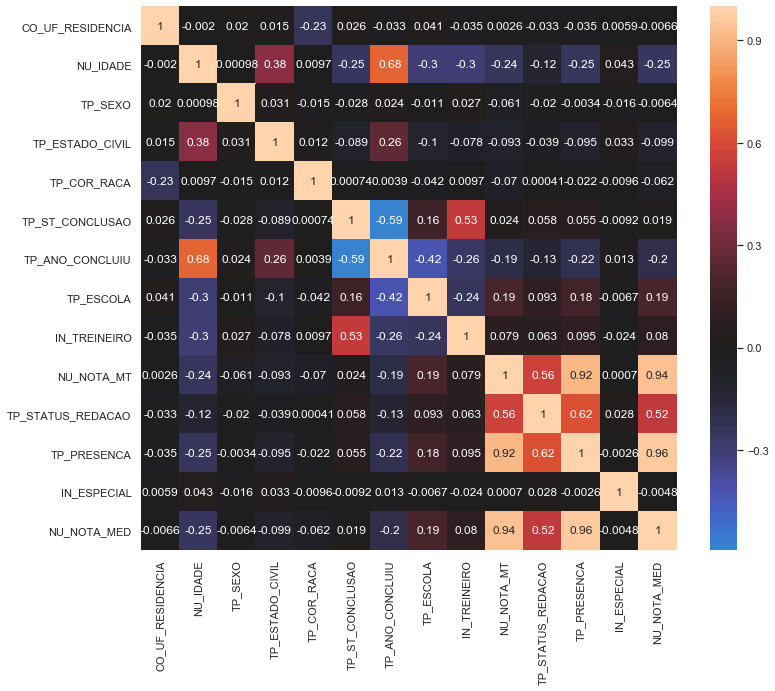

In [983]:
ax = plt.figure(figsize=(12, 10))
ax = sns.heatmap(df_enem_norm.corr(),center=0, annot = True)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!